In [1]:
import warnings
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn import datasets
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
def running(*args):
    with tf.Session() as sess:
        return sess.run(args)

In [3]:
var = tf.add(3, 5, name='var')
var

<tf.Tensor 'var:0' shape=() dtype=int32>

In [4]:
running(var)

(8,)

In [5]:
var = tf.add(np.array(np.arange(10)), np.array(np.arange(10)))

In [6]:
running(var)

(array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18]),)

In [7]:
x = 2
y = 3
op1 = tf.add(x, y, name='add')
op2 = tf.multiply(x, y, 'multiple')
useless = tf.multiply(x, op1)
op3 = tf.pow(op2, op1, name='pow')

running(op3, useless)

(7776, 10)

In [8]:
x_data = datasets.load_boston().data[:, 12]
y_data = datasets.load_boston().target
boston_df = pd.DataFrame([x_data, y_data]).transpose()
boston_df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [9]:
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))
y_predicted = w * x_data + b

In [10]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data))
# running_rate
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

In [11]:
# running(tf.random_poisson(np.arange(10), [10]))
with tf.Session() as sess:
    # tf.Variables 초기화
    sess.run(tf.global_variables_initializer())
    for step in range(10**4):
        # 실제로 Gradient Descent가 실행되는 코드
        sess.run(train)
        if step % 1000 == 0:
            print(f'Step {step} : w {sess.run(w)} b {sess.run(b)}')
            print(f'loss {sess.run(loss)}')        
            print()
    w_out, b_out = sess.run([w, b])

Step 0 : w [1.0134796] b [0.84327805]
loss 313.3062744140625

Step 1000 : w [0.30115533] b [13.713358]
loss 143.2473602294922

Step 2000 : w [-0.17644823] b [21.668482]
loss 78.53192138671875

Step 3000 : w [-0.4717463] b [26.587067]
loss 53.792545318603516

Step 4000 : w [-0.6543224] b [29.628115]
loss 44.335426330566406

Step 5000 : w [-0.76720655] b [31.50835]
loss 40.72020721435547

Step 6000 : w [-0.8369995] b [32.670845]
loss 39.338226318359375

Step 7000 : w [-0.88015187] b [33.389606]
loss 38.80992126464844

Step 8000 : w [-0.9068324] b [33.834007]
loss 38.60795593261719

Step 9000 : w [-0.9233285] b [34.10877]
loss 38.53074645996094



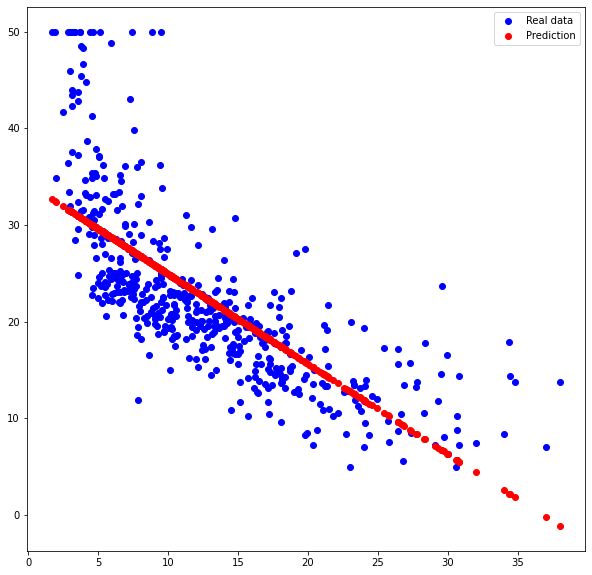

In [12]:
plt.figure(figsize=(10, 10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()

In [13]:
# 506행, 1열
_x_data = tf.reshape(x_data, [len(x_data), 1])
with tf.Session() as sess:
    w = tf.Variable(tf.random_normal([_x_data.shape[1], 5], dtype=tf.float64))
    w_out = tf.Variable(tf.random_normal([w.shape[1], 1], dtype=tf.float64))
    # matmul : matrix multiply
    hidden = tf.nn.sigmoid(tf.matmul(_x_data, w))
    output = tf.matmul(hidden, w_out)


In [14]:
# mean squared error
loss = tf.reduce_mean(tf.square(output - y_data))
# running_rate
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

In [15]:
with tf.Session() as sess:
    # tf.Variables 초기화
    sess.run(tf.global_variables_initializer())
    for step in range(50000):
        # 실제로 Gradient Descent가 실행되는 코드
        sess.run(train)
        if step % 5000 == 0:
            print(f'Step {step} || loss : {sess.run(loss)}')
    output = sess.run(output)

Step 0 || loss : 564.4822175525425
Step 5000 || loss : 84.4408646974685
Step 10000 || loss : 84.43313487226159
Step 15000 || loss : 84.4296119948177
Step 20000 || loss : 84.42757149319236
Step 25000 || loss : 84.42623206236486
Step 30000 || loss : 84.42528184685627
Step 35000 || loss : 84.4245709902753
Step 40000 || loss : 84.42401822466722
Step 45000 || loss : 84.42357553395013


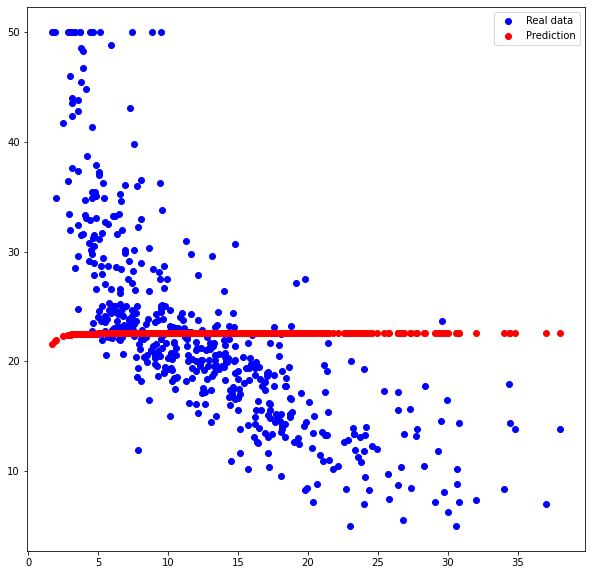

In [16]:
plt.figure(figsize=(10, 10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()

In [20]:
_x_data = tf.reshape(x_data, [len(x_data), 1])
_y_data = tf.reshape(y_data, [len(y_data), 1])

In [21]:
W1 = tf.Variable(tf.random_normal([1, 5], dtype=tf.float64)) # [ # of x's columns, # of nodes in 1st hidden layer ]
W2 = tf.Variable(tf.random_normal([5, 10], dtype=tf.float64)) # [ # of previous W's columns, # of nodes in 2nd hidden layer ]
W_out = tf.Variable(tf.random_normal([10, 1], dtype=tf.float64)) # [ # of previous W's columns, # of y's columns ]

In [22]:
hidden1 = tf.nn.elu(tf.matmul(_x_data, W1))
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2))
output = tf.matmul(hidden2, W_out)

In [27]:
loss = tf.losses.mean_squared_error(output, _y_data) # tf.reduce_mean(tf.square(output - _y_data))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

ValueError: No gradients provided for any variable, check your graph for ops that do not support gradients, between variables ["<tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'Variable_1:0' shape=(1,) dtype=float32_ref>", "<tf.Variable 'Variable_2:0' shape=(1, 5) dtype=float64_ref>", "<tf.Variable 'Variable_3:0' shape=(5, 1) dtype=float64_ref>", "<tf.Variable 'Variable_4:0' shape=(1, 5) dtype=float64_ref>", "<tf.Variable 'Variable_5:0' shape=(5, 10) dtype=float64_ref>", "<tf.Variable 'Variable_6:0' shape=(10, 1) dtype=float64_ref>", "<tf.Variable 'Variable_7:0' shape=(1, 5) dtype=float64_ref>", "<tf.Variable 'Variable_8:0' shape=(5, 10) dtype=float64_ref>", "<tf.Variable 'Variable_9:0' shape=(10, 1) dtype=float64_ref>"] and loss Tensor("Mean_4:0", shape=(), dtype=float64).

In [24]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 

    for step in range(50000):
        sess.run(train)
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))

    output = sess.run(output) 

Step 0 || loss : 68322.15202421536
Step 5000 || loss : 90.09091618213117
Step 10000 || loss : 84.42826491676063
Step 15000 || loss : 84.42136741508365
Step 20000 || loss : 84.41979055341302
Step 25000 || loss : 84.41960272474925
Step 30000 || loss : 84.42239378841097
Step 35000 || loss : 84.41956185270719
Step 40000 || loss : 84.41956062680258
Step 45000 || loss : 84.41955966234569


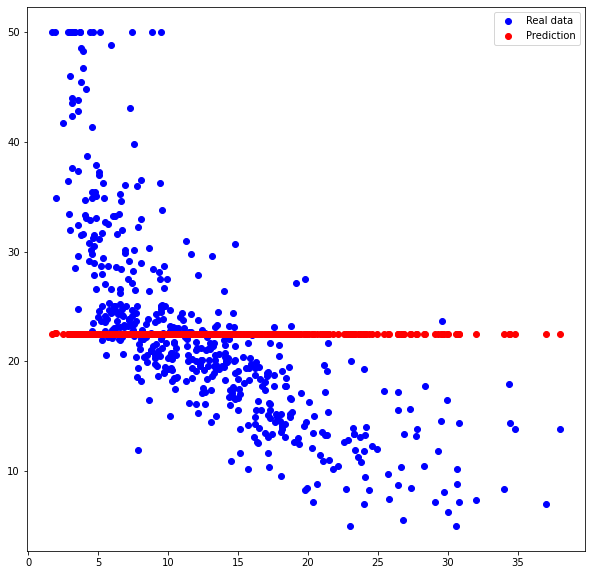

In [25]:
plt.figure(figsize=(10, 10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()